In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5] #Two dimensional array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,) # -1 means skip first element and blank means you want to element
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

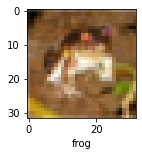

In [10]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
plot_sample(X_train,y_train,0)

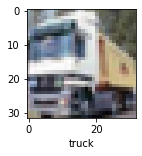

In [11]:
plot_sample(X_train,y_train,1)

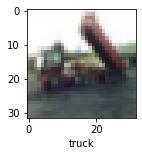

In [12]:
plot_sample(X_train,y_train,2)

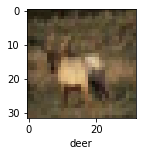

In [13]:
plot_sample(X_train,y_train,3)

In [14]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
X_train = X_train/255
X_test = X_test/255

In [18]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000,activation='relu'),
                         layers.Dense(3000,activation='relu'),
                         layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8058 - accuracy: 0.3574
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6179 - accuracy: 0.4297
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5340 - accuracy: 0.4564
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4751 - accuracy: 0.4816
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4240 - accuracy: 0.4992
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3795 - accuracy: 0.5156
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3428 - accuracy: 0.5301
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3072 - accuracy: 0.5428
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2730 - accuracy: 0.5543
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.240

In [19]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5529 - accuracy: 0.5674


[1.5529452562332153, 0.5673999786376953]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test,y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.75      0.63      1000
           1       0.75      0.62      0.68      1000
           2       0.51      0.41      0.46      1000
           3       0.40      0.36      0.38      1000
           4       0.56      0.40      0.47      1000
           5       0.46      0.53      0.49      1000
           6       0.58      0.69      0.63      1000
           7       0.65      0.63      0.64      1000
           8       0.77      0.57      0.65      1000
           9       0.54      0.72      0.62      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.56     10000
weighted avg       0.58      0.57      0.56     10000



In [24]:
Cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         # dense
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='sigmoid')
])




In [26]:
Cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])


In [27]:
Cnn.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 4ms/step - loss: 1.5295 - accuracy: 0.4469
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1927 - accuracy: 0.5803
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0678 - accuracy: 0.6244
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9905 - accuracy: 0.6544
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9304 - accuracy: 0.6758
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8868 - accuracy: 0.6916
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8479 - accuracy: 0.7033
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8092 - accuracy: 0.7186
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7812 - accuracy: 0.7281
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.75

In [28]:
Cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0435 - accuracy: 0.6571


[2.0434951782226562, 0.6571000218391418]

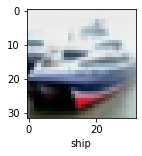

In [29]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [33]:
y_pred = Cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test,y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      1000
           1       0.80      0.78      0.79      1000
           2       0.54      0.53      0.53      1000
           3       0.48      0.43      0.45      1000
           4       0.56      0.62      0.59      1000
           5       0.59      0.55      0.57      1000
           6       0.68      0.78      0.73      1000
           7       0.70      0.67      0.69      1000
           8       0.78      0.75      0.77      1000
           9       0.71      0.73      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

